In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('gld_price_data.csv')

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.corr()

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


In [5]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
df.shape

(2290, 6)

In [7]:
df.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

<AxesSubplot:>

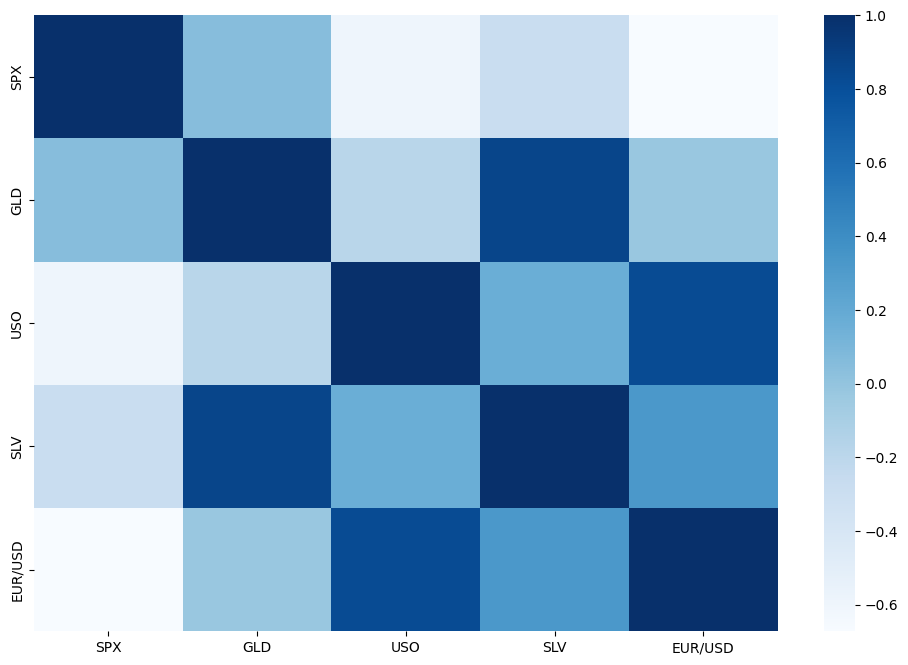

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='Blues')

In [13]:
df.std()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


SPX        519.111540
GLD         23.283346
USO         19.523517
SLV          7.092566
EUR/USD      0.131547
dtype: float64

In [14]:
df.shape

(2290, 6)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [16]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [17]:
 corr=df.corr()

<AxesSubplot:>

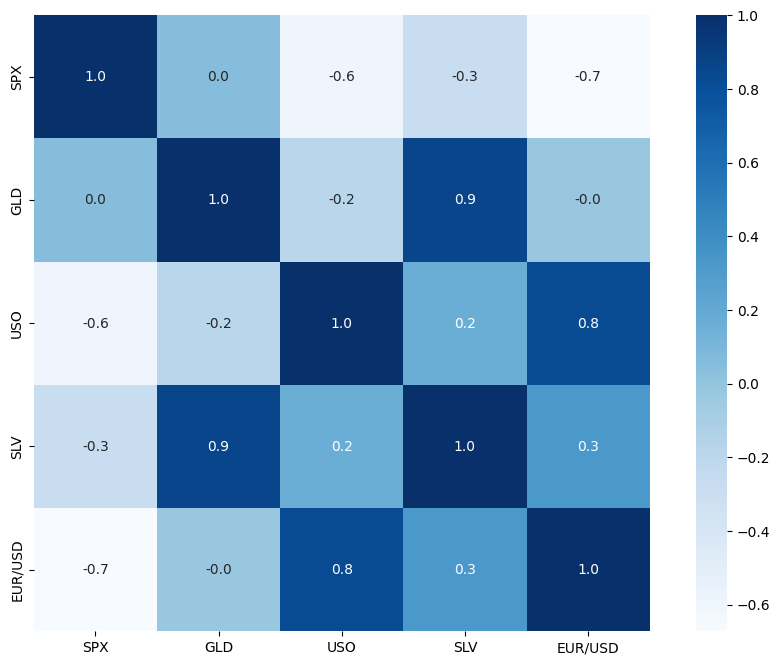

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(corr,cbar=True, square=True, fmt='.1f',
            annot=True, cmap='Blues')

In [21]:
#correlation values of gld
print(corr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='GLD', ylabel='Density'>

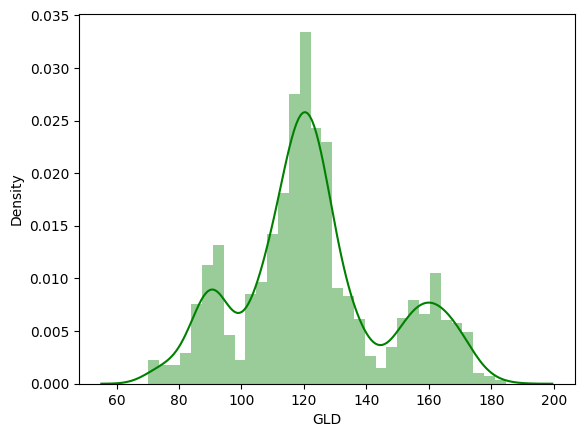

In [22]:
#checking the distribution of the gold price
sns.distplot(df['GLD'],color='green')

In [24]:
#splitting the data and the label
x=df.drop(['GLD','Date'],axis=1)
y=df['GLD']

In [25]:
x.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [26]:
y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [31]:
rf=RandomForestRegressor()

In [32]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [33]:
train_pred=rf.predict(x_train)
error_score=metrics.r2_score(y_train,train_pred)
print(error_score)

0.9984180036489105


In [34]:
test_pred=rf.predict(x_test)
error_score1=metrics.r2_score(y_test,test_pred)
print(error_score1)

0.9848623788753873


In [35]:
rf.score(x_test,y_test)

0.9848623788753873

Text(0, 0.5, 'gold price')

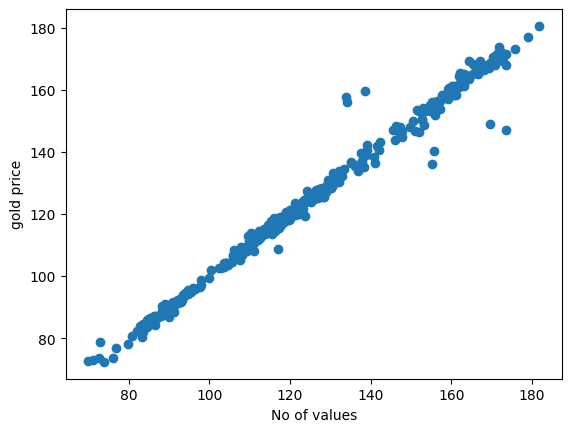

In [38]:
#comparing the actual and the predictyed value
plt.scatter(y_test,test_pred)
plt.xlabel('No of values')
plt.ylabel('gold price')

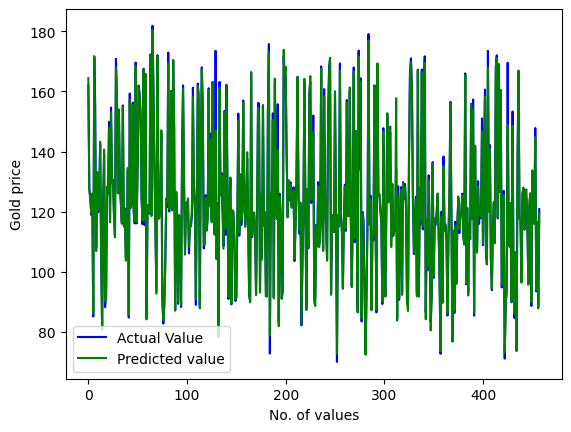

In [49]:
#2nd way
y_test=list(y_test)
plt.plot(y_test, color='Blue', label='Actual Value')
plt.plot(test_pred, color="green", label='Predicted value')
plt.xlabel('No. of values')
plt.ylabel('Gold price')
plt.legend() #for the box at the bottom
plt.show()

In [47]:
y_test

[161.990005,
 127.580002,
 124.57,
 118.970001,
 125.720001,
 85.129997,
 171.470001,
 155.330002,
 108.089996,
 130.589996,
 119.82,
 124.599998,
 142.380005,
 105.699997,
 80.760002,
 123.709999,
 139.050003,
 88.25,
 92.309998,
 127.839996,
 126.300003,
 149.880005,
 117.730003,
 154.669998,
 130.559998,
 130.619995,
 119.769997,
 112.059998,
 170.850006,
 157.770004,
 126.230003,
 152.990005,
 128.830002,
 122.900002,
 115.989998,
 155.360001,
 116.010002,
 121.129997,
 104.68,
 107.730003,
 133.509995,
 84.769997,
 159.300003,
 121.239998,
 122.959999,
 156.300003,
 119.68,
 116.080002,
 169.630005,
 116.099998,
 135.199997,
 161.960007,
 159.460007,
 151.619995,
 124.389999,
 115.779999,
 167.559998,
 115.550003,
 165.800003,
 84.459999,
 122.129997,
 122.07,
 119.330002,
 172.339996,
 119.410004,
 181.809998,
 160.630005,
 135.110001,
 114.739998,
 93.129997,
 172.100006,
 117.75,
 118.519997,
 124.790001,
 145.649994,
 91.230003,
 82.75,
 89.220001,
 102.839996,
 124.150002,
 1

In [48]:
test_pred

array([164.44530068, 127.56119895, 124.14729964, 119.50209892,
       126.02859904,  86.14939824, 171.78490148, 135.9691999 ,
       106.88280079, 133.19500203, 120.61959921, 124.68350064,
       143.27859831, 104.56400011,  80.83869923, 119.47240003,
       140.6647997 ,  90.24580043,  91.47589929, 128.32850216,
       125.9417991 , 147.96779992, 116.46430162, 153.20519911,
       129.43849816, 129.6322009 , 118.02720111, 111.47690052,
       168.01620297, 158.40159788, 126.03420195, 154.01170137,
       127.13419918, 122.7191978 , 116.29030109, 154.75519989,
       115.01179971, 120.46410139, 103.67400207, 105.30440024,
       134.58499956,  85.53999923, 157.0958014 , 121.46100018,
       122.39040098, 155.52850035, 120.54510006, 116.73039977,
       168.50680336, 116.56060082, 136.5538023 , 161.93549818,
       157.95410033, 153.32780041, 124.03360041, 117.00810043,
       167.25420037, 117.28059959, 165.80590068,  84.15890023,
       121.34779908, 122.18930018, 119.85070044, 172.00

In [50]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [51]:
x1=df.drop(['GLD','Date'],axis=1)
y1=df['GLD']

In [52]:
scaler=StandardScaler()

In [53]:
scaler.fit(x1)

StandardScaler()

In [55]:
standard_scale=scaler.transform(x1)

In [56]:
x1=standard_scale
y1=df['GLD']

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=3)

In [58]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [62]:
train_pred2=rf.predict(x_train)
error_score2=metrics.r2_score(y_train,train_pred2)
print(error_score2)

0.9984601557895756


In [63]:
test_pred2=rf.predict(x_test)
error_score3=metrics.r2_score(y_test,test_pred2)
print(error_score3)

0.9860114606327393
